In [2]:
import numpy as np
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [3]:

mpDraw = mp.solutions.drawing_utils
mpFaceMesh = mp.solutions.face_mesh
faceMesh = mpFaceMesh.FaceMesh(static_image_mode=True, max_num_faces=1)
drawSpec = mpDraw.DrawingSpec(thickness=1, circle_radius=1)

In [4]:
train_data_dir = 'train/'
test_data_dir = 'test/'
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
train_datagen = image.ImageDataGenerator(
    rescale= 1,
    shear_range= 0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip= True,
    fill_mode= 'nearest',
    width_shift_range= 5,
    height_shift_range= 5,
    vertical_flip= True
)
test_datagen = image.ImageDataGenerator(rescale=1/255.0)

In [5]:
train_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    color_mode= 'grayscale',
    target_size= (224, 224),
    batch_size= 32,
    class_mode= 'categorical',
    shuffle= True
)

test_generator = test_datagen.flow_from_directory(
    directory=test_data_dir,
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:

cap = cv2.VideoCapture(0)
while cap.isOpened():
    success, img = cap.read()
    if not success:
        print('Empty frame')
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = faceMesh.process(img)
    if result.multi_face_landmarks:
        for facelm in result.multi_face_landmarks:
            mpDraw.draw_landmarks(img, facelm, connection_drawing_spec=mpFaceMesh.FACEMESH_CONTOURS, landmark_drawing_spec=drawSpec)
    cv2.imshow('Video', img)
    if cv2.waitKey(20) & 0xFF==ord('d'):
        break
cap.release()
cap.destroyAllWindows()

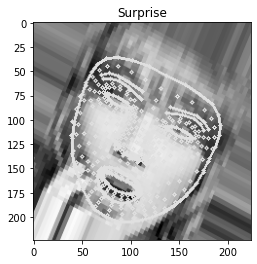

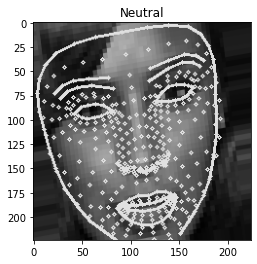

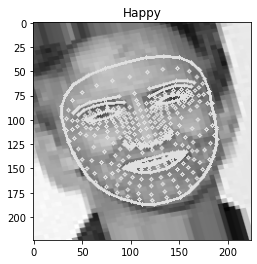

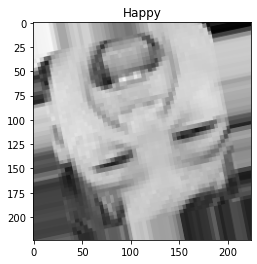

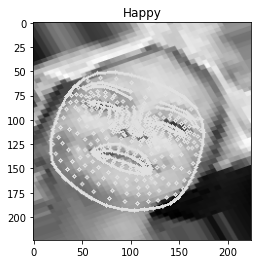

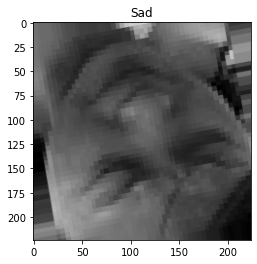

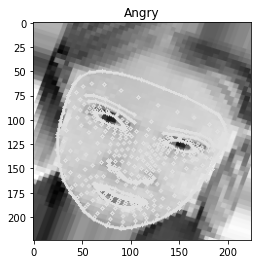

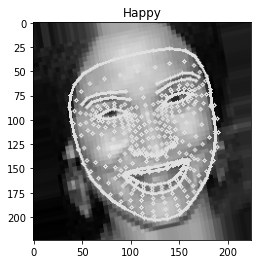

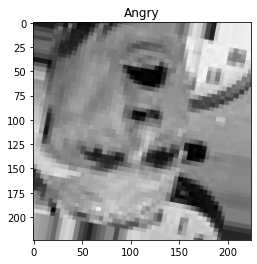

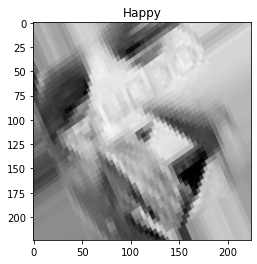

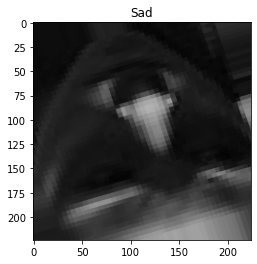

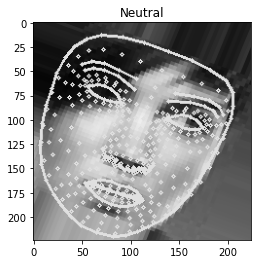

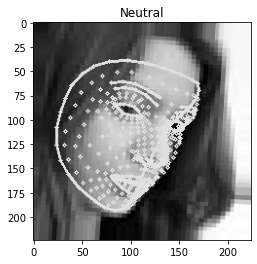

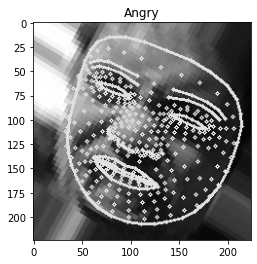

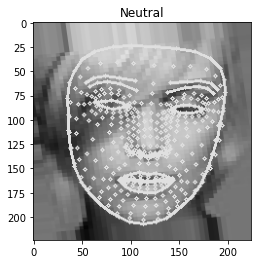

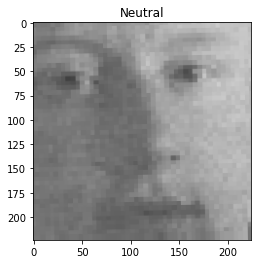

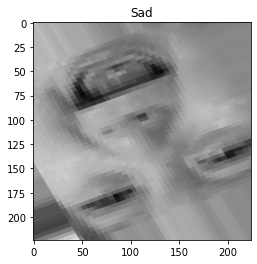

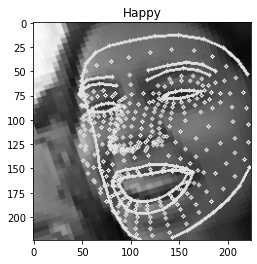

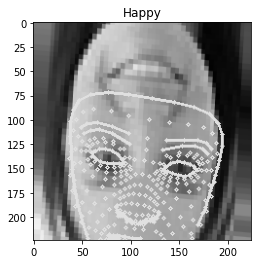

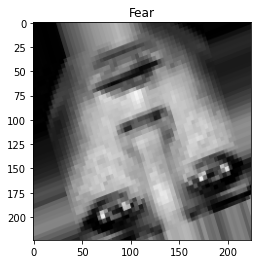

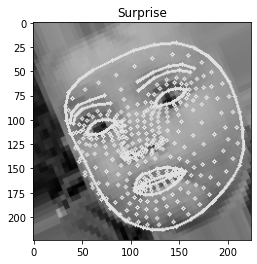

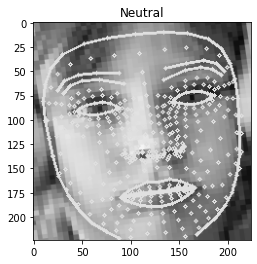

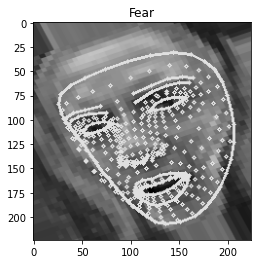

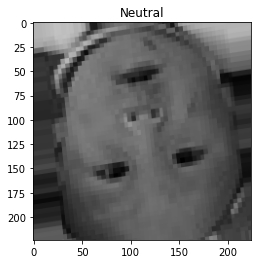

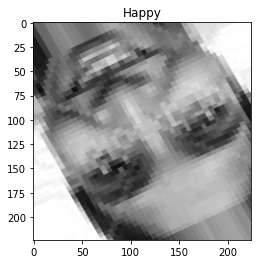

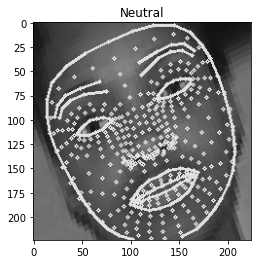

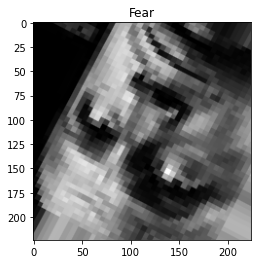

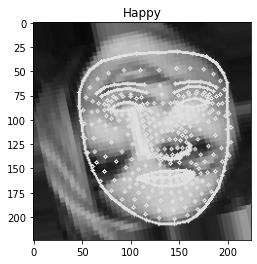

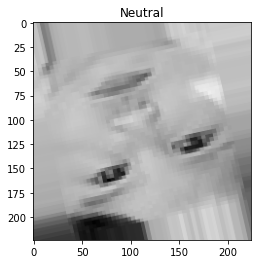

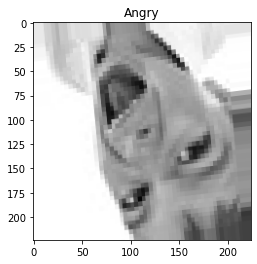

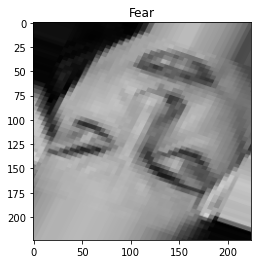

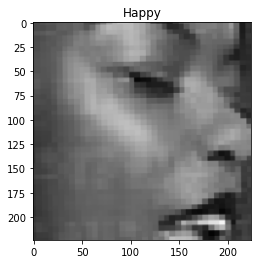

In [6]:
img, label = train_generator.next()
for ele_img, ele_label in zip(img, label):
    ima = cv2.cvtColor(ele_img, cv2.COLOR_BGR2RGB)
    ima = ima.astype('uint8')
    res = faceMesh.process(ima)
    if res.multi_face_landmarks:
        for facelm in res.multi_face_landmarks:
            mpDraw.draw_landmarks(ima, facelm,mpFaceMesh.FACEMESH_CONTOURS, landmark_drawing_spec=drawSpec)
    plt.imshow(ima)
    plt.title(labels[np.argmax(ele_label)])
    plt.show()

